In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Generate Data

In [2]:
#generate some data
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

In [3]:
#each feature will have zero mean
X = X - np.mean(X, axis=0)

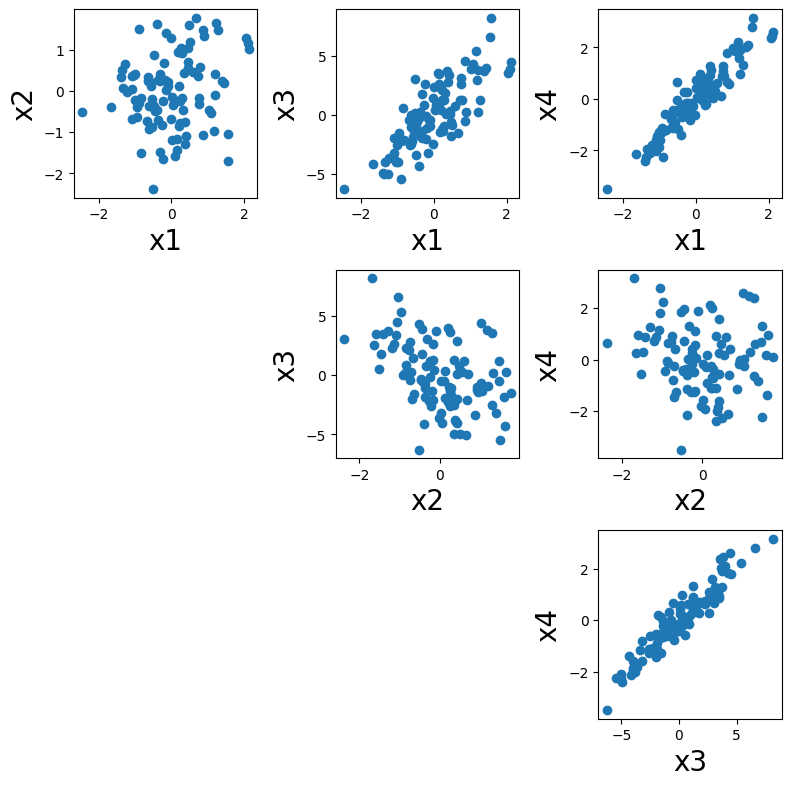

In [4]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i], X[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

## Observations:
### - x1 and x2 do not seem correlated
### - x1 seems very correlated with both x3 and x4
### - x2 seems somewhat correlated with both x3 and x4
### - x3 and x4 seem very correlated

# Apply PCA

In [5]:
#initialize
pca = PCA(n_components=4)

#fit
pca.fit(X)

PCA(n_components=4)

In [6]:
#get principal components
principal_comps_builtin = pca.components_.T

In [ ]:
X.T

In [7]:
#print each principal component
for i,component in enumerate(pca.components_):
    print(f'principal component {i}')
    print(component)
    print()

principal component 0
[ 0.22393471 -0.10888042  0.88692657  0.38904955]

principal component 1
[-0.47744421 -0.80236566  0.16212202 -0.31933184]

principal component 2
[-0.16624761 -0.31709335 -0.37251508  0.85618109]

principal component 3
[-0.83322386  0.49376735  0.21979588  0.11671146]



# Can we do this by hand?

## Principal components are the eigenvectors of the covariance matrix

In [10]:
#compute covariance matrix
#https://www.youtube.com/watch?v=F-aku75OpoM
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100

In [11]:
#eigenvalues and eigenvectors of covariance matrix
eigvecs = np.linalg.eig(cov_matrix)

In [12]:
#sort order by magnitude of eigenvalue
ordering = np.argsort(eigvecs[0])[::-1]

In [13]:
#get eigenvectors
principal_comps_byhand = eigvecs[1][:,ordering]

In [14]:
#our by-hand eigenvectors
principal_comps_byhand

array([[-0.22393471, -0.47744421, -0.16624761, -0.83322386],
       [ 0.10888042, -0.80236566, -0.31709335,  0.49376735],
       [-0.88692657,  0.16212202, -0.37251508,  0.21979588],
       [-0.38904955, -0.31933184,  0.85618109,  0.11671146]])

In [15]:
#results from built-in call
principal_comps_builtin

array([[ 0.22393471, -0.47744421, -0.16624761, -0.83322386],
       [-0.10888042, -0.80236566, -0.31709335,  0.49376735],
       [ 0.88692657,  0.16212202, -0.37251508,  0.21979588],
       [ 0.38904955, -0.31933184,  0.85618109,  0.11671146]])

# ✔️